#### Face Verification

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

#### Face detector: MTCNN

In [2]:
faceDetector = MTCNN()

In [5]:
def extractFaces(imagePath,targetSize=(1280,1280)):
  img = plt.imread(imagePath)
  result = faceDetector.detect_faces(img)
  faces = []
  for i in range(len(result)):
    x1, y1, width, height = result[i]['box']
    x2, y2 = x1 + width, y1 + height
    face = img[y1:y2, x1:x2]
    face = Image.fromarray(face)
    face = face.resize(targetSize)
    faceArray = asarray(face)
    faces.append(faceArray)
  return faces

In [6]:
Face_1 = extractFaces("Data/KTP1.JPG")
Face_1

[array([[[ 4, 49, 62],
         [ 4, 49, 62],
         [ 4, 49, 62],
         ...,
         [31, 36, 26],
         [31, 36, 26],
         [31, 36, 26]],
 
        [[ 4, 49, 62],
         [ 4, 49, 62],
         [ 4, 49, 62],
         ...,
         [31, 36, 26],
         [31, 36, 26],
         [31, 36, 26]],
 
        [[ 4, 49, 62],
         [ 4, 49, 62],
         [ 4, 49, 62],
         ...,
         [31, 36, 26],
         [31, 36, 26],
         [31, 36, 26]],
 
        ...,
 
        [[ 9, 23,  5],
         [ 9, 23,  5],
         [ 9, 23,  5],
         ...,
         [22, 15,  0],
         [22, 15,  0],
         [22, 15,  0]],
 
        [[ 9, 23,  5],
         [ 9, 23,  5],
         [ 9, 23,  5],
         ...,
         [22, 15,  0],
         [22, 15,  0],
         [22, 15,  0]],
 
        [[ 9, 23,  5],
         [ 9, 23,  5],
         [ 9, 23,  5],
         ...,
         [22, 15,  0],
         [22, 15,  0],
         [22, 15,  0]]], dtype=uint8)]

In [7]:
Face_2 = extractFaces("Data/Selfie.JPG")
Face_2 

[array([[[40, 39, 35],
         [40, 39, 35],
         [40, 39, 35],
         ...,
         [52, 51, 47],
         [52, 51, 47],
         [52, 51, 47]],
 
        [[40, 39, 35],
         [40, 39, 35],
         [40, 39, 35],
         ...,
         [52, 51, 47],
         [52, 51, 47],
         [52, 51, 47]],
 
        [[40, 39, 35],
         [40, 39, 35],
         [40, 39, 35],
         ...,
         [52, 51, 47],
         [52, 51, 47],
         [52, 51, 47]],
 
        ...,
 
        [[25, 24, 20],
         [25, 24, 20],
         [24, 23, 19],
         ...,
         [23, 19, 16],
         [23, 19, 16],
         [23, 19, 16]],
 
        [[25, 24, 20],
         [25, 24, 20],
         [24, 23, 19],
         ...,
         [23, 19, 16],
         [23, 19, 16],
         [23, 19, 16]],
 
        [[25, 24, 20],
         [25, 24, 20],
         [24, 23, 19],
         ...,
         [23, 19, 16],
         [23, 19, 16],
         [23, 19, 16]]], dtype=uint8)]

#### Face comparison: VGGFace-Keras

In [8]:
def getFaceEmbedding(faces):
  faces = asarray(faces,"float32")
  preprocessFaces = preprocess_input(faces, version=2)
  model = VGGFace(model='resnet50', include_top=False, input_shape=(1280, 1280, 3), pooling='avg')
  faceEmbeddings = model.predict(preprocessFaces)
  return faceEmbeddings

In [9]:
FaceEmbeddings_1 = getFaceEmbedding(Face_1)
FaceEmbeddings_1.shape

(1, 2048)

In [10]:
FaceEmbeddings_2 = getFaceEmbedding(Face_2)
FaceEmbeddings_2.shape

(1, 2048)

#### Test Face comparison: VGGFace-Keras

In [13]:
def faceMatch(knownFace,knownFaceEmbeddings,testFace,testFaceEmbedding):
  score = cosine(knownFaceEmbeddings, testFaceEmbedding)
  fig, axes = plt.subplots(nrows=1, ncols=2)  
  axes[0].imshow(np.array(knownFace).reshape((1280,1280,3)))
  axes[1].imshow(np.array(testFace).reshape((1280,1280,3)))
  if(score<=0.5):
    print("Face Match.. Score : "+str(score))
  else:
    print("Face Not Match.. Score : "+str(score))

Face Match.. Score : 0.062352120876312256


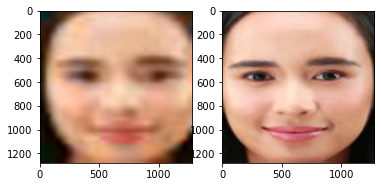

In [14]:
faceMatch(Face_1,FaceEmbeddings_1,Face_2[0],FaceEmbeddings_2[0])